In [ ]:
#Angela María Arias Rojas 201728551
#Raúl Andrés Pardo Moreno 20172736

# Exercise 08

## Analyze how travelers expressed their feelings on Twitter

A sentiment analysis job about the problems of each major U.S. airline. 
Twitter data was scraped from February of 2015 and contributors were 
asked to first classify positive, negative, and neutral tweets, followed
by categorizing negative reasons (such as "late flight" or "rude service").

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
import zipfile
with zipfile.ZipFile('C:/Users/harol/Desktop/Disco Duro/Angela/Maestria/Intersemestral/Deep Learning/GitHub/AppliedDeepLearningClass-master/datasets/Tweets.zip', 'r') as z:
    f = z.open('Tweets.csv')
    tweets = pd.read_csv(f, index_col=0)

tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [2]:
tweets.shape

(14640, 14)

### Proportion of tweets with each sentiment

In [3]:
tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

### Proportion of tweets per airline


In [4]:
tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

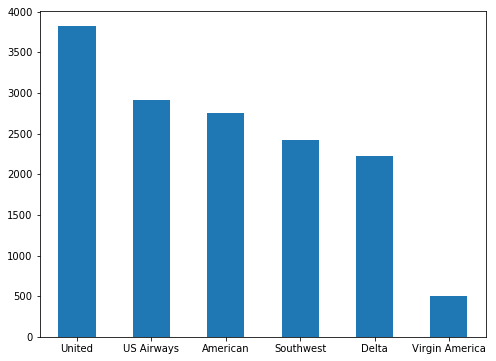

In [5]:
pd.Series(tweets["airline"]).value_counts().plot(kind = "bar",figsize=(8,6),rot = 0)

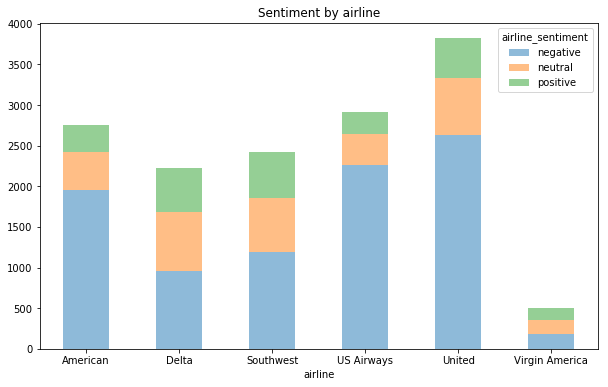

In [6]:
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiment by airline")

# Exercise 8.1 

Predict the sentiment using CountVectorizer, stopwords, n_grams, stemmer, TfidfVectorizer

use Random Forest classifier

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [8]:
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [ ]:
#crear un modelo de random forest para predecir el sentimiento de los tweets
#count vectorize,..., finalmente usando ten frequency vectorize

In [9]:
# use CountVectorizer to create document-term matrices from X
vect = CountVectorizer()
X_dtm = vect.fit_transform(X)

In [10]:
temp=X_dtm.todense()

In [11]:
vect.vocabulary_

{'virginamerica': 14273,
 'what': 14551,
 'dhepburn': 4804,
 'said': 11646,
 'plus': 10438,
 'you': 14944,
 've': 14193,
 'added': 1965,
 'commercials': 4030,
 'to': 13326,
 'the': 13120,
 'experience': 5665,
 'tacky': 12925,
 'didn': 4821,
 'today': 13330,
 'must': 9234,
 'mean': 8837,
 'need': 9375,
 'take': 12941,
 'another': 2331,
 'trip': 13509,
 'it': 7685,
 'really': 11020,
 'aggressive': 2054,
 'blast': 3070,
 'obnoxious': 9726,
 'entertainment': 5455,
 'in': 7381,
 'your': 14953,
 'guests': 6733,
 'faces': 5740,
 'amp': 2263,
 'they': 13167,
 'have': 6868,
 'little': 8392,
 'recourse': 11078,
 'and': 2281,
 'big': 3007,
 'bad': 2746,
 'thing': 13176,
 'about': 1862,
 'seriously': 11914,
 'would': 14778,
 'pay': 10175,
 '30': 761,
 'flight': 6004,
 'for': 6157,
 'seats': 11832,
 'that': 13115,
 'this': 13188,
 'playing': 10403,
 'only': 9836,
 'flying': 6101,
 'va': 14145,
 'yes': 14922,
 'nearly': 9371,
 'every': 5572,
 'time': 13270,
 'fly': 6086,
 'vx': 14345,
 'ear': 5238,


In [12]:
# rows are documents, columns are terms (aka "tokens" or "features")
X_dtm.shape

(14640, 15051)

In [13]:
# last 50 features
print(vect.get_feature_names()[-150:-100])

['yayayay', 'ybmbgs0dhn', 'ybv0xaowkv', 'yc7v2s0iod', 'yccitaep3s', 'yco9dikpt9', 'yday', 'yea', 'yeah', 'year', 'yearly', 'years', 'yeehaw', 'yeg', 'yell', 'yelled', 'yelling', 'yellow', 'yeniettelswood', 'yep', 'yer', 'yes', 'yeseniahernandez', 'yessir', 'yest', 'yesterday', 'yet', 'yf9nhmwyff', 'yh1kzkyzrr', 'yhz', 'yi4wguk5tr', 'yield', 'yikes', 'yiwlhqhzgp', 'ymftw1uyhr', 'ymmh9k4cbr', 'ync2zut4zz', 'yo', 'yoga', 'yogurt', 'yokkhhqcmp', 'york', 'yorkshire2002', 'you', 'youareonyourown', 'youcandobetter', 'youcouldntmakethis', 'youd', 'youdidit', 'youknowyouwantto']


In [14]:
# show vectorizer options
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [15]:
vect = CountVectorizer(lowercase=False)
X_dtm = vect.fit_transform(X)
X_dtm.shape

(14640, 17964)

In [16]:
print(X_dtm.todense()[0].tolist())

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [17]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2))
X_dtm = vect.fit_transform(X)
X_dtm.shape

(14640, 117630)

In [18]:
# last 50 features
print(vect.get_feature_names()[-1000:-950])

['you spelled', 'you spoke', 'you sporadically', 'you standby', 'you standing', 'you started', 'you starting', 'you stay', 'you step', 'you stick', 'you still', 'you stink', 'you stood', 'you stop', 'you stopped', 'you strand', 'you stranded', 'you strandusindenver', 'you stuck', 'you suck', 'you suggest', 'you suggested', 'you super', 'you supp', 'you sure', 'you swa', 'you switched', 'you take', 'you talking', 'you teach', 'you tell', 'you telling', 'you terribly', 'you thank', 'you thankful', 'you thanks', 'you that', 'you the', 'you then', 'you there', 'you they', 'you think', 'you this', 'you though', 'you threw', 'you ticket', 'you time', 'you times', 'you to', 'you today']


In [20]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

#Predict shares
# Default CountVectorizer
vect = CountVectorizer()
X_dtm = vect.fit_transform(X)

# use Naive Bayes to predict the star rating
nb = MultinomialNB()
pd.Series(cross_val_score(nb, X_dtm, y, cv=10)).describe()

count    10.000000
mean      0.743646
std       0.024237
min       0.714286
25%       0.727711
50%       0.742915
75%       0.748591
max       0.798497
dtype: float64

In [28]:
#Modelo RandomForest
nb = RandomForestClassifier()
pd.Series(cross_val_score(nb, X_dtm, y, cv=10)).describe()


count    10.000000
mean      0.710790
std       0.025146
min       0.655055
25%       0.701418
50%       0.716041
75%       0.721824
max       0.753415
dtype: float64

In [29]:
# define a function that accepts a vectorizer and calculates the accuracy
def tokenize_test(vect):
    X_dtm = vect.fit_transform(X)
    print('Features: ', X_dtm.shape[1])
    nb = RandomForestClassifier()
    print(pd.Series(cross_val_score(nb, X_dtm, y, cv=10)).describe())

In [30]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2))
tokenize_test(vect)

Features:  117630
count    10.000000
mean      0.718712
std       0.022312
min       0.682377
25%       0.703297
50%       0.722772
75%       0.728018
max       0.762295
dtype: float64


In [31]:
#Default stopwords
vect = CountVectorizer(stop_words='english')
tokenize_test(vect)

Features:  14770
count    10.000000
mean      0.694941
std       0.047069
min       0.591530
25%       0.673839
50%       0.703793
75%       0.722386
max       0.763661
dtype: float64


In [33]:
#Default n_grams
# include 1-grams and 2-grams, and only include terms that appear at least 2 times
vect = CountVectorizer(ngram_range=(1, 2), min_df=2)
tokenize_test(vect)

Features:  31146
count    10.000000
mean      0.716120
std       0.027377
min       0.657104
25%       0.705329
50%       0.719410
75%       0.728019
max       0.765027
dtype: float64


In [36]:
##Default stemmer
stemmer = SnowballStemmer('english')
vect = CountVectorizer(stemmer)
tokenize_test(vect)

Features:  15051
count    10.000000
mean      0.713590
std       0.024058
min       0.660519
25%       0.707742
50%       0.712432
75%       0.724184
max       0.754781
dtype: float64


In [38]:
# Default TfidfVectorizer
vect = TfidfVectorizer()
tokenize_test(vect)

C:\Users\harol\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


Features:  15051
count    10.000000
mean      0.702114
std       0.029186
min       0.635929
25%       0.700564
50%       0.704677
75%       0.716701
max       0.746585
dtype: float64


In [39]:
#Using TF-IDF to Summarize a text
# create a document-term matrix using TF-IDF
vect = TfidfVectorizer(stop_words='english')
tokenize_test(vect)

C:\Users\harol\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


Features:  14770
count    10.000000
mean      0.694534
std       0.043142
min       0.582650
25%       0.693187
50%       0.706184
75%       0.712261
max       0.747268
dtype: float64


# Exercise 8.2

Train a Deep Neural Network with the following architecture:

- Input = text 
- Dense(128)
- Relu Activation
- BatchNormalization
- Dropout(0.5)
- Dense(10, Softmax)

Optimized using rmsprop using as loss categorical_crossentropy

Hints: 
- test with two iterations then try more. 
- learning can be ajusted

Evaluate the performance using the testing set (aprox 55% with 50 epochs)

In [42]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Dropout, Activation, BatchNormalization
from keras.optimizers import RMSprop
from keras.callbacks import History
from livelossplot import PlotLossesKeras

In [43]:
X_dtm.shape

(14640, 15051)

In [52]:
y.head()

tweet_id
570306133677760513    0
570301130888122368    1
570301083672813571    0
570301031407624196   -1
570300817074462722   -1
Name: airline_sentiment, dtype: int64

In [53]:
y_data=np_utils.to_categorical(y,3) #creación de y

In [58]:
y_data.shape

(14640, 3)

In [54]:
model = Sequential()
model.add(Dense(128, activation = 'relu',input_shape = (15051,)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(3)) 
model.add(Activation('softmax'))


In [55]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               1926656   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 387       
_________________________________________________________________
activation_2 (Activation)    (None, 3)                 0         
Total params: 1,927,555
Trainable params: 1,927,299
Non-trainable params: 256
_________________________________________________________________


In [56]:
from keras.optimizers import rmsprop
model.compile(loss = 'categorical_crossentropy',  #funcion de perdida
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [62]:
model.fit(X_dtm, y_data, epochs=10, verbose=2,validation_split=0.2)

Train on 11712 samples, validate on 2928 samples
Epoch 1/10
 - 10s - loss: 0.2395 - acc: 0.9191 - val_loss: 0.1316 - val_acc: 0.9549
Epoch 2/10
 - 11s - loss: 0.2236 - acc: 0.9245 - val_loss: 0.1439 - val_acc: 0.9508
Epoch 3/10
 - 10s - loss: 0.2111 - acc: 0.9291 - val_loss: 0.1554 - val_acc: 0.9433
Epoch 4/10
 - 10s - loss: 0.1947 - acc: 0.9354 - val_loss: 0.1669 - val_acc: 0.9375
Epoch 5/10
 - 11s - loss: 0.1847 - acc: 0.9378 - val_loss: 0.1813 - val_acc: 0.9314
Epoch 6/10
 - 11s - loss: 0.1800 - acc: 0.9426 - val_loss: 0.1792 - val_acc: 0.9317
Epoch 7/10
 - 11s - loss: 0.1771 - acc: 0.9421 - val_loss: 0.1863 - val_acc: 0.9327
Epoch 8/10
 - 11s - loss: 0.1778 - acc: 0.9436 - val_loss: 0.1895 - val_acc: 0.9283
Epoch 9/10
 - 12s - loss: 0.1647 - acc: 0.9473 - val_loss: 0.2001 - val_acc: 0.9276
Epoch 10/10
 - 12s - loss: 0.1629 - acc: 0.9453 - val_loss: 0.2160 - val_acc: 0.9214


In [63]:
print(model.predict(X_dtm))

[[9.9627566e-01 1.3211818e-03 2.4032039e-03]
 [4.3339602e-04 9.9941337e-01 1.5315737e-04]
 [9.9995911e-01 4.4856056e-06 3.6341986e-05]
 ...
 [8.7626296e-01 1.2005811e-01 3.6789295e-03]
 [2.2362054e-03 8.0373324e-04 9.9696004e-01]
 [7.1522512e-02 9.5087904e-03 9.1896868e-01]]


In [64]:
score = model.evaluate(X_dtm, y_data)
print('Test score:', score[0])
print('Test accuracy:', score[1])

14640/14640 [==============================] - 4s 269us/step
Test score: 0.08436860904667547
Test accuracy: 0.9745901639344262
